In [2]:
import nltk, gensim, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from scipy import stats

sns.set_context('talk')

In [3]:
#Instantiate DataFrame of wrangled data
df = pd.read_csv('..\\data\\wrangled_data.csv')
df.BODY[5:10]

5    PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...
6    Lovely, large one bedroom apartment in an attr...
7    Privately situated, ocean view cottage steps a...
8    PROPERTY INFO ID: 71165240Rent: 2723 / MonthBe...
9    EDGARTOWN VILLAGE - Condominium living! A deli...
Name: BODY, dtype: object

#### Before being vectorized, the 'BODY' feature will be used to engineer some new features.

In [4]:
def count_chars(text):
    return len(text)
def count_words(text):
    return len(text.split())
def count_sentences(text):
    return len(nltk.sent_tokenize(text))
def count_unique_words(text):
    return len(set(text.split()))

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Work_Remote\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df['CHAR_COUNT'] = df['BODY'].apply(lambda x:count_chars(x))
df['WORD_COUNT'] = df['BODY'].apply(lambda x:count_words(x))
df['SENTENCE_COUNT'] = df['BODY'].apply(lambda x:count_sentences(x))
df['UNIQUE_COUNT'] = df['BODY'].apply(lambda x:count_unique_words(x))
df['AVG_WORD_LENGTH'] = df['CHAR_COUNT']/df['WORD_COUNT']
df['AVG_SENTENCE_LENGTH'] = df['WORD_COUNT']/df['SENTENCE_COUNT']
df['UNIQUE_WORD_RATIO'] = df['UNIQUE_COUNT']/df['WORD_COUNT']

In [8]:
df[5:10]

,LISTING_ID,BODY,PRICE,AREA_SQFT,ALLOWS_CATS,ALLOWS_DOGS,CHAR_COUNT,WORD_COUNT,SENTENCE_COUNT,UNIQUE_COUNT,AVG_WORD_LENGTH,AVG_SENTENCE_LENGTH,UNIQUE_WORD_RATIO
5,7075381886,PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...,2450,950.0,1.0,0.0,1966,279,12,211,7.046595,23.250000,0.756272
6,7080746122,"Lovely, large one bedroom apartment in an attr...",975,800.0,0.0,0.0,516,71,6,64,7.267606,11.833333,0.901408
7,7080759732,"Privately situated, ocean view cottage steps a...",1500,577.0,1.0,1.0,1010,162,10,125,6.234568,16.200000,0.771605
8,7080759800,PROPERTY INFO ID: 71165240Rent: 2723 / MonthBe...,2723,840.0,1.0,0.0,1976,297,16,232,6.653199,18.562500,0.781145
9,7080761824,EDGARTOWN VILLAGE - Condominium living! A deli...,1500,493.0,1.0,1.0,670,95,7,83,7.052632,13.571429,0.873684


In [10]:
print('Average number of characters per listing:', np.mean(df['CHAR_COUNT']))
print('Average number of words per listing:', np.mean(df['WORD_COUNT']))
print('Average number of sentences per listing:', np.mean(df['SENTENCE_COUNT']))
print('Average number of unique words per listing:', np.mean(df['UNIQUE_COUNT']))

Average number of characters per listing: 988.196695104386
Average number of words per listing: 152.37424618939838
Average number of sentences per listing: 9.96096012915684
Average number of unique words per listing: 116.63188717770146


(array([1.1809e+04, 3.3452e+04, 2.6421e+04, 1.6331e+04, 1.2875e+04,
        8.3050e+03, 6.7810e+03, 4.4290e+03, 2.5330e+03, 1.8320e+03,
        5.6600e+02, 4.3300e+02, 1.3300e+02, 5.7000e+01, 5.6000e+01,
        1.3800e+02, 5.5000e+01, 2.7000e+01, 2.3000e+01, 1.5000e+01,
        8.0000e+00, 5.0000e+00, 8.0000e+00, 8.0000e+00, 1.1000e+01,
        8.0000e+00, 6.0000e+00, 8.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 4.66200e+01, 9.22400e+01, 1.37860e+02, 1.83480e+02,
        2.29100e+02, 2.74720e+02, 3.20340e+02, 3.65960e+02, 4.11580e+02,
        4.57200e+02, 5.02820e+02, 5.48440e+02, 5.94060e+02, 6.39680e+02,
        6.85300e+02, 7.30920e+02, 7.76540e+02, 8.22160e+02, 8.67780e+02,
        9.13400e+02, 9.590

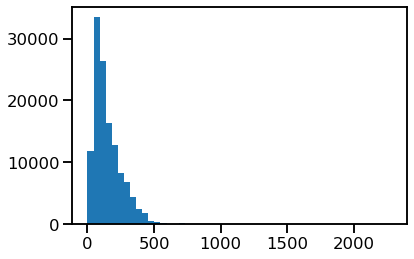

In [15]:
plt.hist(df.WORD_COUNT, bins = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd68ce3490>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd68ce3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd68ce3130>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd68cf0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd68cf05b0>],
 'means': []}

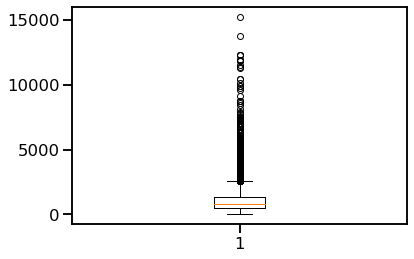

In [11]:
plt.boxplot(df['CHAR_COUNT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd68da7610>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd68da7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd68da72b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd68db73d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd68db7730>],
 'means': []}

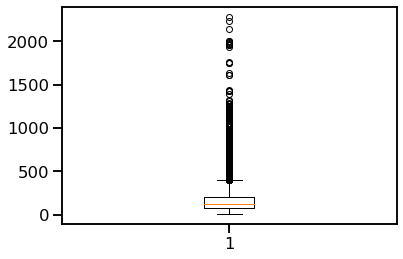

In [12]:
plt.boxplot(df['WORD_COUNT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd68e077c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd68e07e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd68e07460>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd68e145b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd68e14910>],
 'means': []}

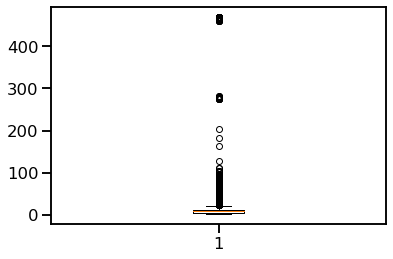

In [13]:
plt.boxplot(df['SENTENCE_COUNT'])

In [16]:
df.to_csv('..\\data\\full_features.csv')